In [1]:
from lazylib import make, GoogLeNet, device, takeConfusionMatrix, takeRocCurve, now, register
import torch

/home/luizp/projects/pibit/pibit/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n = now()
epocs = 2
model, metrics = make(
    EPOCHS=epocs, 
    BATCH_SIZE=128, 
    LEARNING_RATE=1e-3, 
    csv_path="/home/luizp/projects/pibit/src/data/processed/csv/nslClean.csv", 
    MODEL=GoogLeNet().to(device()), 
    SEED=1701,
    xcol=2
    ) 
register(metrics, f"/home/luizp/projects/pibit/src/0utput/text/{n}.txt")
torch.save(model.state_dict(), f"/home/luizp/projects/pibit/src/0utput/models/{n}_alexnet_{epocs}.nnModel")


[14-02-2024 13-31-52] Epoch 001 Acc: 0.8975 Loss: 0.23053558: 100%|██████████| 99/99 [00:14<00:00,  6.68it/s]
[14-02-2024 13-32-18] Epoch 001 Val. Acc: 0.9596 Val. Loss: 0.11803490: 100%|██████████| 886/886 [00:26<00:00, 34.06it/s]


[60523  4455   127 48269]


[14-02-2024 13-32-33] Epoch 002 Acc: 0.9706 Loss: 0.08853495: 100%|██████████| 99/99 [00:14<00:00,  6.85it/s]
[14-02-2024 13-33-01] Epoch 002 Val. Acc: 0.9762 Val. Loss: 0.08562752: 100%|██████████| 886/886 [00:27<00:00, 32.29it/s]


[60189  2238   461 50486]
Finished experiment!


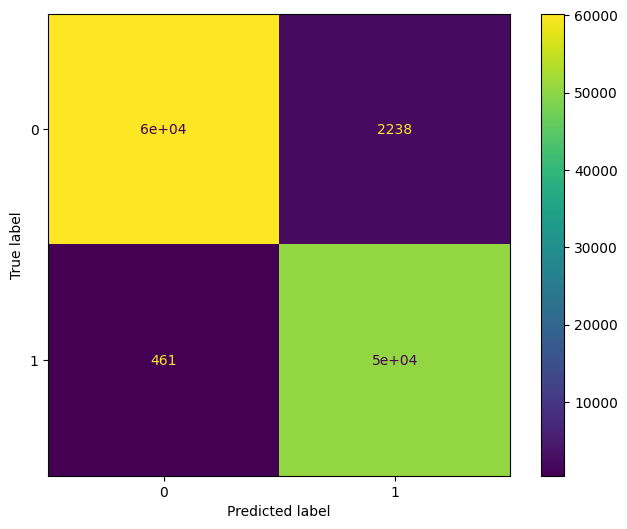

In [3]:
cm = takeConfusionMatrix(metrics, epocs-1, f"/home/luizp/projects/pibit/src/0utput/img/confusionMatix/{n}.png")

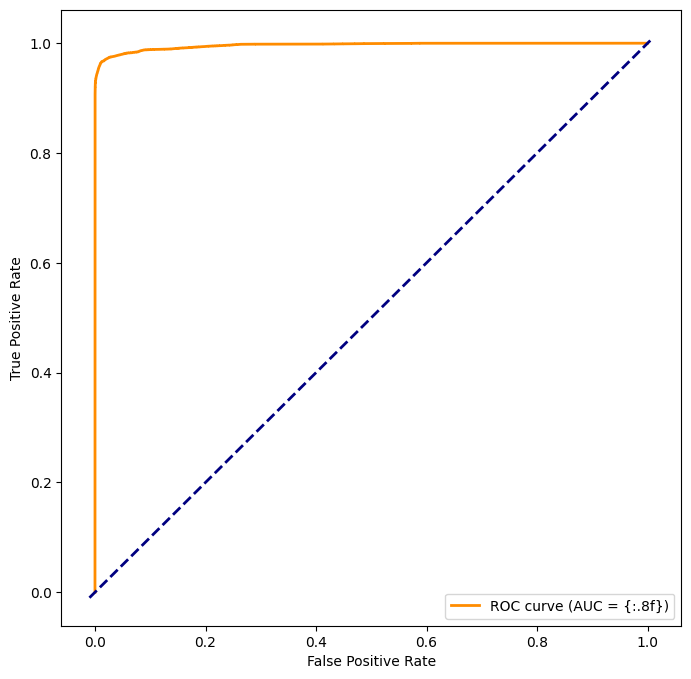

In [4]:
takeRocCurve(metrics, epocs-1, f"/home/luizp/projects/pibit/src/0utput/img/rocCurve/{n}.png")